# Manually Adding Operator Steps

Make a simple test case

In [1]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sim = rebound.Simulation()
sim.G = 4*np.pi**2 # use units of AU, yrs and solar masses

sim.add(m=1.)
sim.add(a=1.)
sim.add(a=2.)
sim.add(a=3.)
sim.move_to_com()
ps = sim.particles

Imagine we want to add mass loss to the simulation:

In [2]:
rebx = reboundx.Extras(sim)
modifymass = rebx.load_operator("modify_mass")

By default, `rebx.add_operator` will add half timesteps of the passed operator before and after the main REBOUND timestep. You can also specify individual operator steps manually, specifying  `dtfraction` (i.e., the fraction of a timestep `sim.dt` the operator should act over) and `timing` ("pre" or "post", which specifies whether it gets added before or after the main REBOUND timestep) parameters. For example for a simple first-order scheme where the operator acts for a full timestep after the main step (see Tamayo et al. 2019 for much more of this!):

In [3]:
rebx.add_operator(modifymass, dtfraction=1., timing="post")

/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:653: RuntimeWarning: REBOUNDx: Operators that affect particle trajectories with adaptive timesteps can give spurious results. Use sim.ri_ias15.epsilon=0 for fixed timestep with IAS, or use a different integrator.
  warnings.warn(msg[1:], RuntimeWarning)


/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


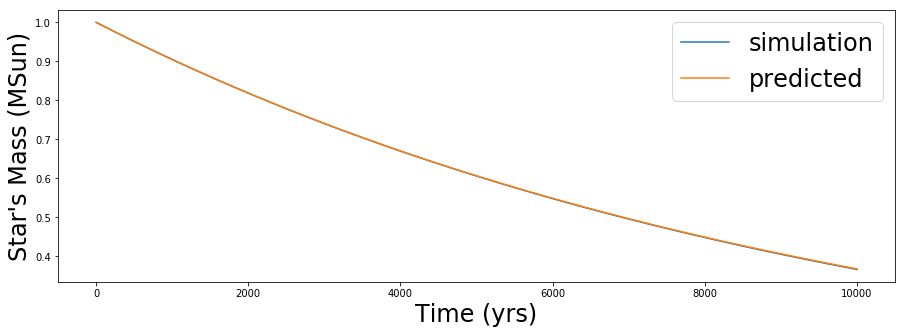

In [4]:
ps[0].params["tau_mass"] = -1.e4
Nout = 1000
mass = np.zeros(Nout)
times = np.linspace(0., 1.e4, Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    mass[i] = ps[0].m
    
pred = np.e**(times/ps[0].params["tau_mass"])
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(times,mass, label='simulation')
ax.plot(times,pred, label='predicted')
ax.set_xlabel("Time (yrs)", fontsize=24)
ax.set_ylabel("Star's Mass (MSun)", fontsize=24)
ax.legend(fontsize=24)